In [123]:
#####Gráficas####
!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [111]:
import pandas as pd
print("\base datos noticieros\n")
caracol = pd.read_excel(r"C:\Users\osbal\Caracol\CaracolDB_procesamiento.xlsx")
rcn = pd.read_excel(r"C:\Users\osbal\RCN t\RCNDB_procesamiento.xlsx")
city = pd.read_excel(r"C:\Users\osbal\CityTv\CityTvDB_procesamiento.xlsx")
pCaracol = pd.read_excel(r"C:\Users\osbal\Caracol\CaracolDB.xlsx")
pRcn = pd.read_excel(r"C:\Users\osbal\RCN t\RCNDB.xlsx")
pCity = pd.read_excel(r"C:\Users\osbal\CityTv\CityTvDB.xlsx")
base = caracol.append(rcn).append(city)
palabras = pCity.append(pRcn).append(pCaracol)
print(base.tail())
print("\n")
print(base.columns)

ase datos noticieros

   noticiero   año         mes  dia  id_audio clasificacion  score  \
65    CityTv  2022   Noviembre   28         1      NEGATIVA    0.2   
66    CityTv  2022     Octubre   16         1      NEGATIVA    0.1   
67    CityTv  2022     Octubre    3         1      POSITIVA    0.2   
68    CityTv  2022  Septiembre   29         1      POSITIVA    0.2   
69    CityTv  2022  Septiembre   30         1      NEGATIVA    0.0   

    subjetividad   n_score  
65      0.300000 -0.250000  
66      0.223077 -0.300000  
67      0.231579 -0.100000  
68      0.343478 -0.100000  
69      0.222222 -0.214286  


Index(['noticiero', 'año', 'mes', 'dia', 'id_audio', 'clasificacion', 'score',
       'subjetividad', 'n_score'],
      dtype='object')


C:\Users\osbal\AppData\Local\Temp\ipykernel_17540\2766150342.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = caracol.append(rcn).append(city)
C:\Users\osbal\AppData\Local\Temp\ipykernel_17540\2766150342.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  palabras = pCity.append(pRcn).append(pCaracol)


In [74]:
# tabla de frecuencia xray
pd.value_counts(caracol['clasificacion'])

NEGATIVA    40
POSITIVA    22
NEUTRA       8
Name: clasificacion, dtype: int64

In [75]:
# tabla de frecuencia xray
pd.value_counts(rcn['clasificacion'])

NEGATIVA    29
POSITIVA    28
NEUTRA      13
Name: clasificacion, dtype: int64

In [76]:
# tabla de frecuencia xray
pd.value_counts(city['clasificacion'])

NEGATIVA    39
POSITIVA    25
NEUTRA       6
Name: clasificacion, dtype: int64

In [139]:
# tabla de frecuencia xray
pd.value_counts(base['clasificacion'])
pd.crosstab(index=base['año'],
            columns=base['clasificacion'], margins=True)

clasificacion,NEGATIVA,NEUTRA,POSITIVA,All
año,,,,
2016,37,13,22,72
2018,33,6,33,72
2022,38,8,20,66
All,108,27,75,210


    palabra_frecuente  frecuencia_palabra
373           persona                 182
381           policía                 150
323             mujer                  82
496      transmilenio                  75
85               caso                  67


Index(['palabra_frecuente', 'frecuencia_palabra'], dtype='object')


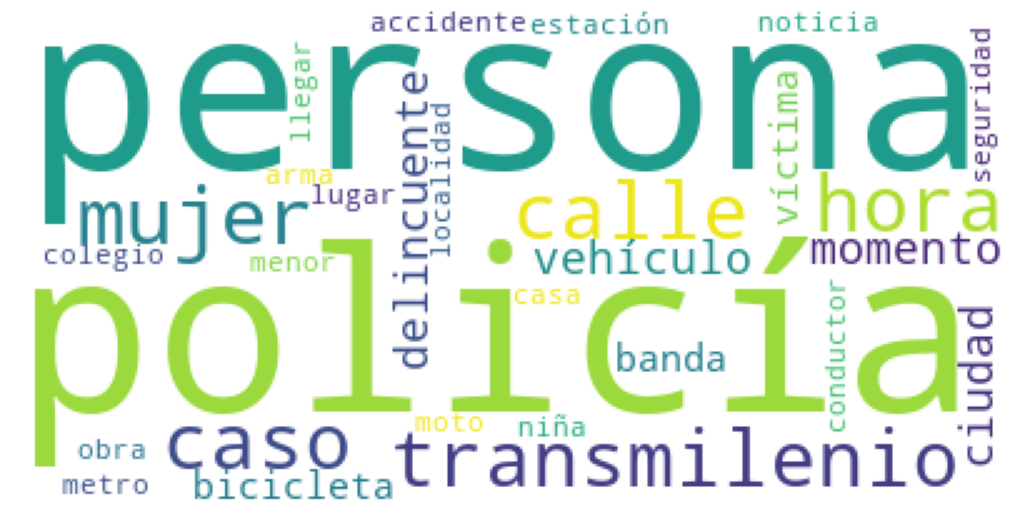

In [132]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import csv

palabras = palabras.groupby(by = ["palabra_frecuente"])["frecuencia_palabra"].sum().reset_index().sort_values(by=["frecuencia_palabra"], ascending=False)
print(palabras.head())
print("\n")
print(palabras.columns)

text = ""
cont = 0
for index, row in palabras.iterrows():
    text += getattr(row, "palabra_frecuente") + " "
    cont+= 1
    if(cont == 30):
        break
        
def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "WHITE")
    image.paste(picture, (0, 0), picture)
        
mask = transform_white_backgroud(".\images.png")

word_cloud = WordCloud(mask=mask, background_color='white', contour_width=1, contour_color='blue', max_words=200, min_font_size=5, collocation_threshold=10).generate(text)

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

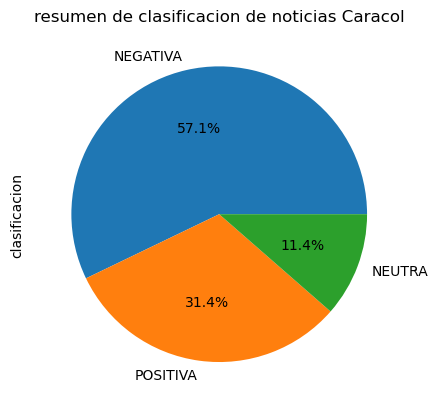

In [77]:
# Gráfico de clasificacion de noticias
plot = caracol['clasificacion'].value_counts().plot(kind='pie',
                                            title='resumen de clasificacion de noticias Caracol', autopct='%1.1f%%')

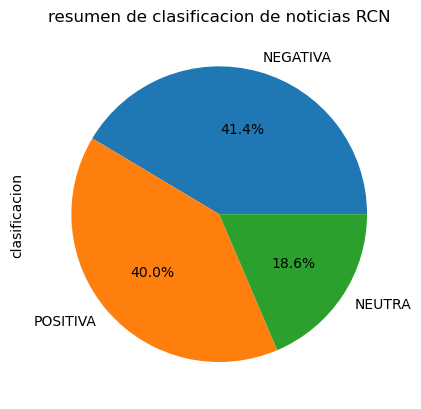

In [78]:
# Gráfico de clasificacion de noticias
plot = rcn['clasificacion'].value_counts().plot(kind='pie',
                                            title='resumen de clasificacion de noticias RCN', autopct='%1.1f%%')

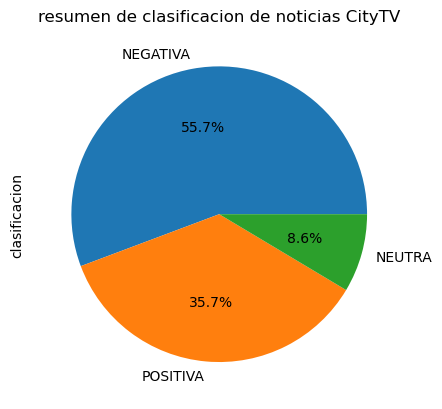

In [67]:
# Gráfico de clasificacion de noticias
plot = city['clasificacion'].value_counts().plot(kind='pie',
                                            title='resumen de clasificacion de noticias CityTV', autopct='%1.1f%%')

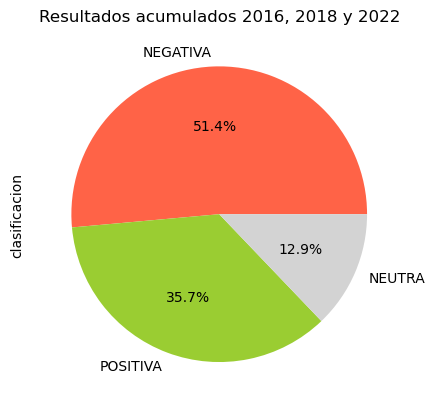

In [141]:
# Gráfico de clasificacion de noticias
colores = ["tomato","yellowgreen", "lightgray", ]
plot = base['clasificacion'].value_counts().plot(kind='pie',
                                            title='Resultados acumulados 2016, 2018 y 2022', autopct='%1.1f%%', colors=colores)

In [80]:
"""plot = pd.crosstab(index=caracol['clasificacion'],
            columns=caracol['año']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')"""
resumen = pd.crosstab(index=caracol['año'],
            columns=caracol['clasificacion'])
resumen = resumen.stack()
resumen = resumen.reset_index().rename_axis(columns = None)

neg = resumen['clasificacion'] == 'NEGATIVA'
pos = resumen['clasificacion'] == 'POSITIVA'
neu = resumen['clasificacion'] == 'NEUTRA'

resumen = resumen.assign(percentage = 0)
resumen.loc[resumen['año'] == 2016, ('percentage')] = (resumen[0]/resumen.loc[resumen['año'] == 2016, (0)].sum())*100
resumen.loc[resumen['año'] == 2022, ('percentage')] = (resumen[0]/resumen.loc[resumen['año'] == 2022, (0)].sum())*100
resumen.loc[resumen['año'] == 2018, ('percentage')] = (resumen[0]/resumen.loc[resumen['año'] == 2018, (0)].sum())*100

resumen['percentage'] = resumen['percentage'].round(1)

negativas = resumen[neg]
positivas = resumen[pos]
neutras = resumen[neu]


clasificacion,NEGATIVA,NEUTRA,POSITIVA
año,,,
2016,51.39,18.06,30.56
2018,45.83,8.33,45.83
2022,57.58,12.12,30.30
All,51.43,12.86,35.71


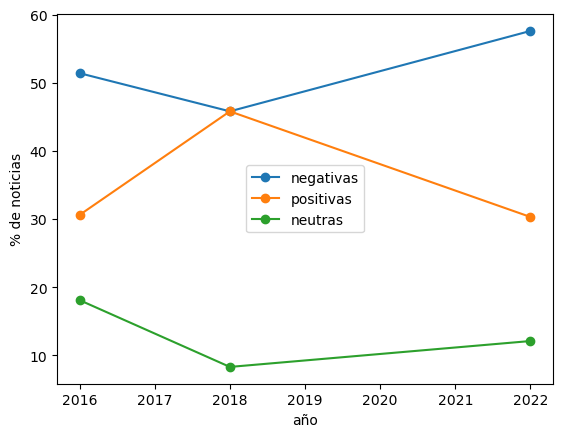

In [137]:
from matplotlib import pyplot as plt
x=negativas['año'].values
y=negativas['percentage'].values
xp=positivas['año'].values
yp=positivas['percentage'].values
xn=neutras['año'].values
yn=neutras['percentage'].values
plt.plot(x,y,'-o', label='negativas')
plt.plot(xp, yp, '-o', label='positivas')
plt.plot(xn, yn, '-o', label='neutras')
plt.legend()
plt.xlabel("año")
plt.ylabel("% de noticias")

# Tabla de contingencia estado civil x sexo
pd.crosstab(index=base['año'],
            columns=base['clasificacion'], margins=True, normalize='index').round(4)*100


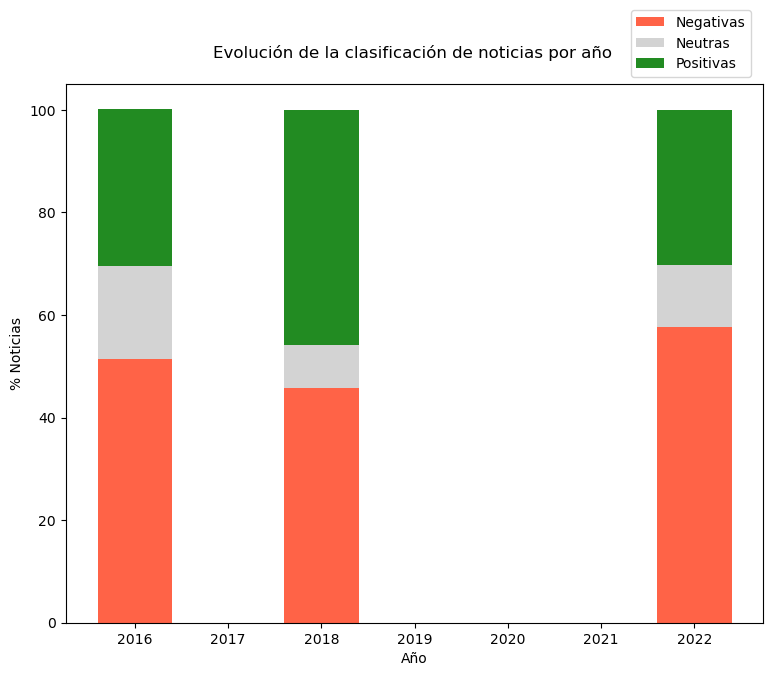

In [82]:
from matplotlib import pyplot as plt
x=negativas['año'].values
y=negativas['percentage'].values
yp=positivas['percentage'].values
yn=neutras['percentage'].values
     

        
plt.figure(figsize=(9,7))

plt.title ('Evolución de la clasificación de noticias por año \n')
plt.bar(x,y,color="tomato",label="Negativas")
plt.bar(x,yn, bottom=y, color="lightgray",label="Neutras")
plt.bar(x,yp, bottom=yn+y, color="forestgreen",label="Positivas")
plt.ylabel ('% Noticias')
plt.xlabel ('Año')
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

